Some of the code in this lab was copied from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

# Network Clustering - Lab

## Introduction

In this lab you'll practice your clustering and visualization skills to investigate stackoverflow! Specifically, the dataset you'll be investigating examines tags on stackoverflow. With this, you should be able to explore some of the related technologies currently in use by developers.

## Objectives

In this lab you will: 

- Make visualizations of clusters and gain insights about how the clusters have formed

## Load the Dataset

Load the data from the `'stack-overflow-tag-network/stack_network_links.csv'` file. For now, simply load the file as a standard pandas DataFrame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

In [4]:
# Your code here
df = pd.read_csv('stack-overflow-tag-network/stack_network_links.csv')
df.head()

source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925

## Transform the Dataset into a Network Graph using NetworkX

Transform the dataset from a Pandas DataFrame into a NetworkX graph.

In [8]:
# this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
G = nx.Graph()
for row in df.index:
    source = df['source'][row]
    target = df['target'][row]
    weight = df['value'][row]
    G.add_edge(source, target, weight=weight)
print(len(G.nodes))

115


## Create an Initial Graph Visualization

Next, create an initial visualization of the network.

C:\Users\zasz\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


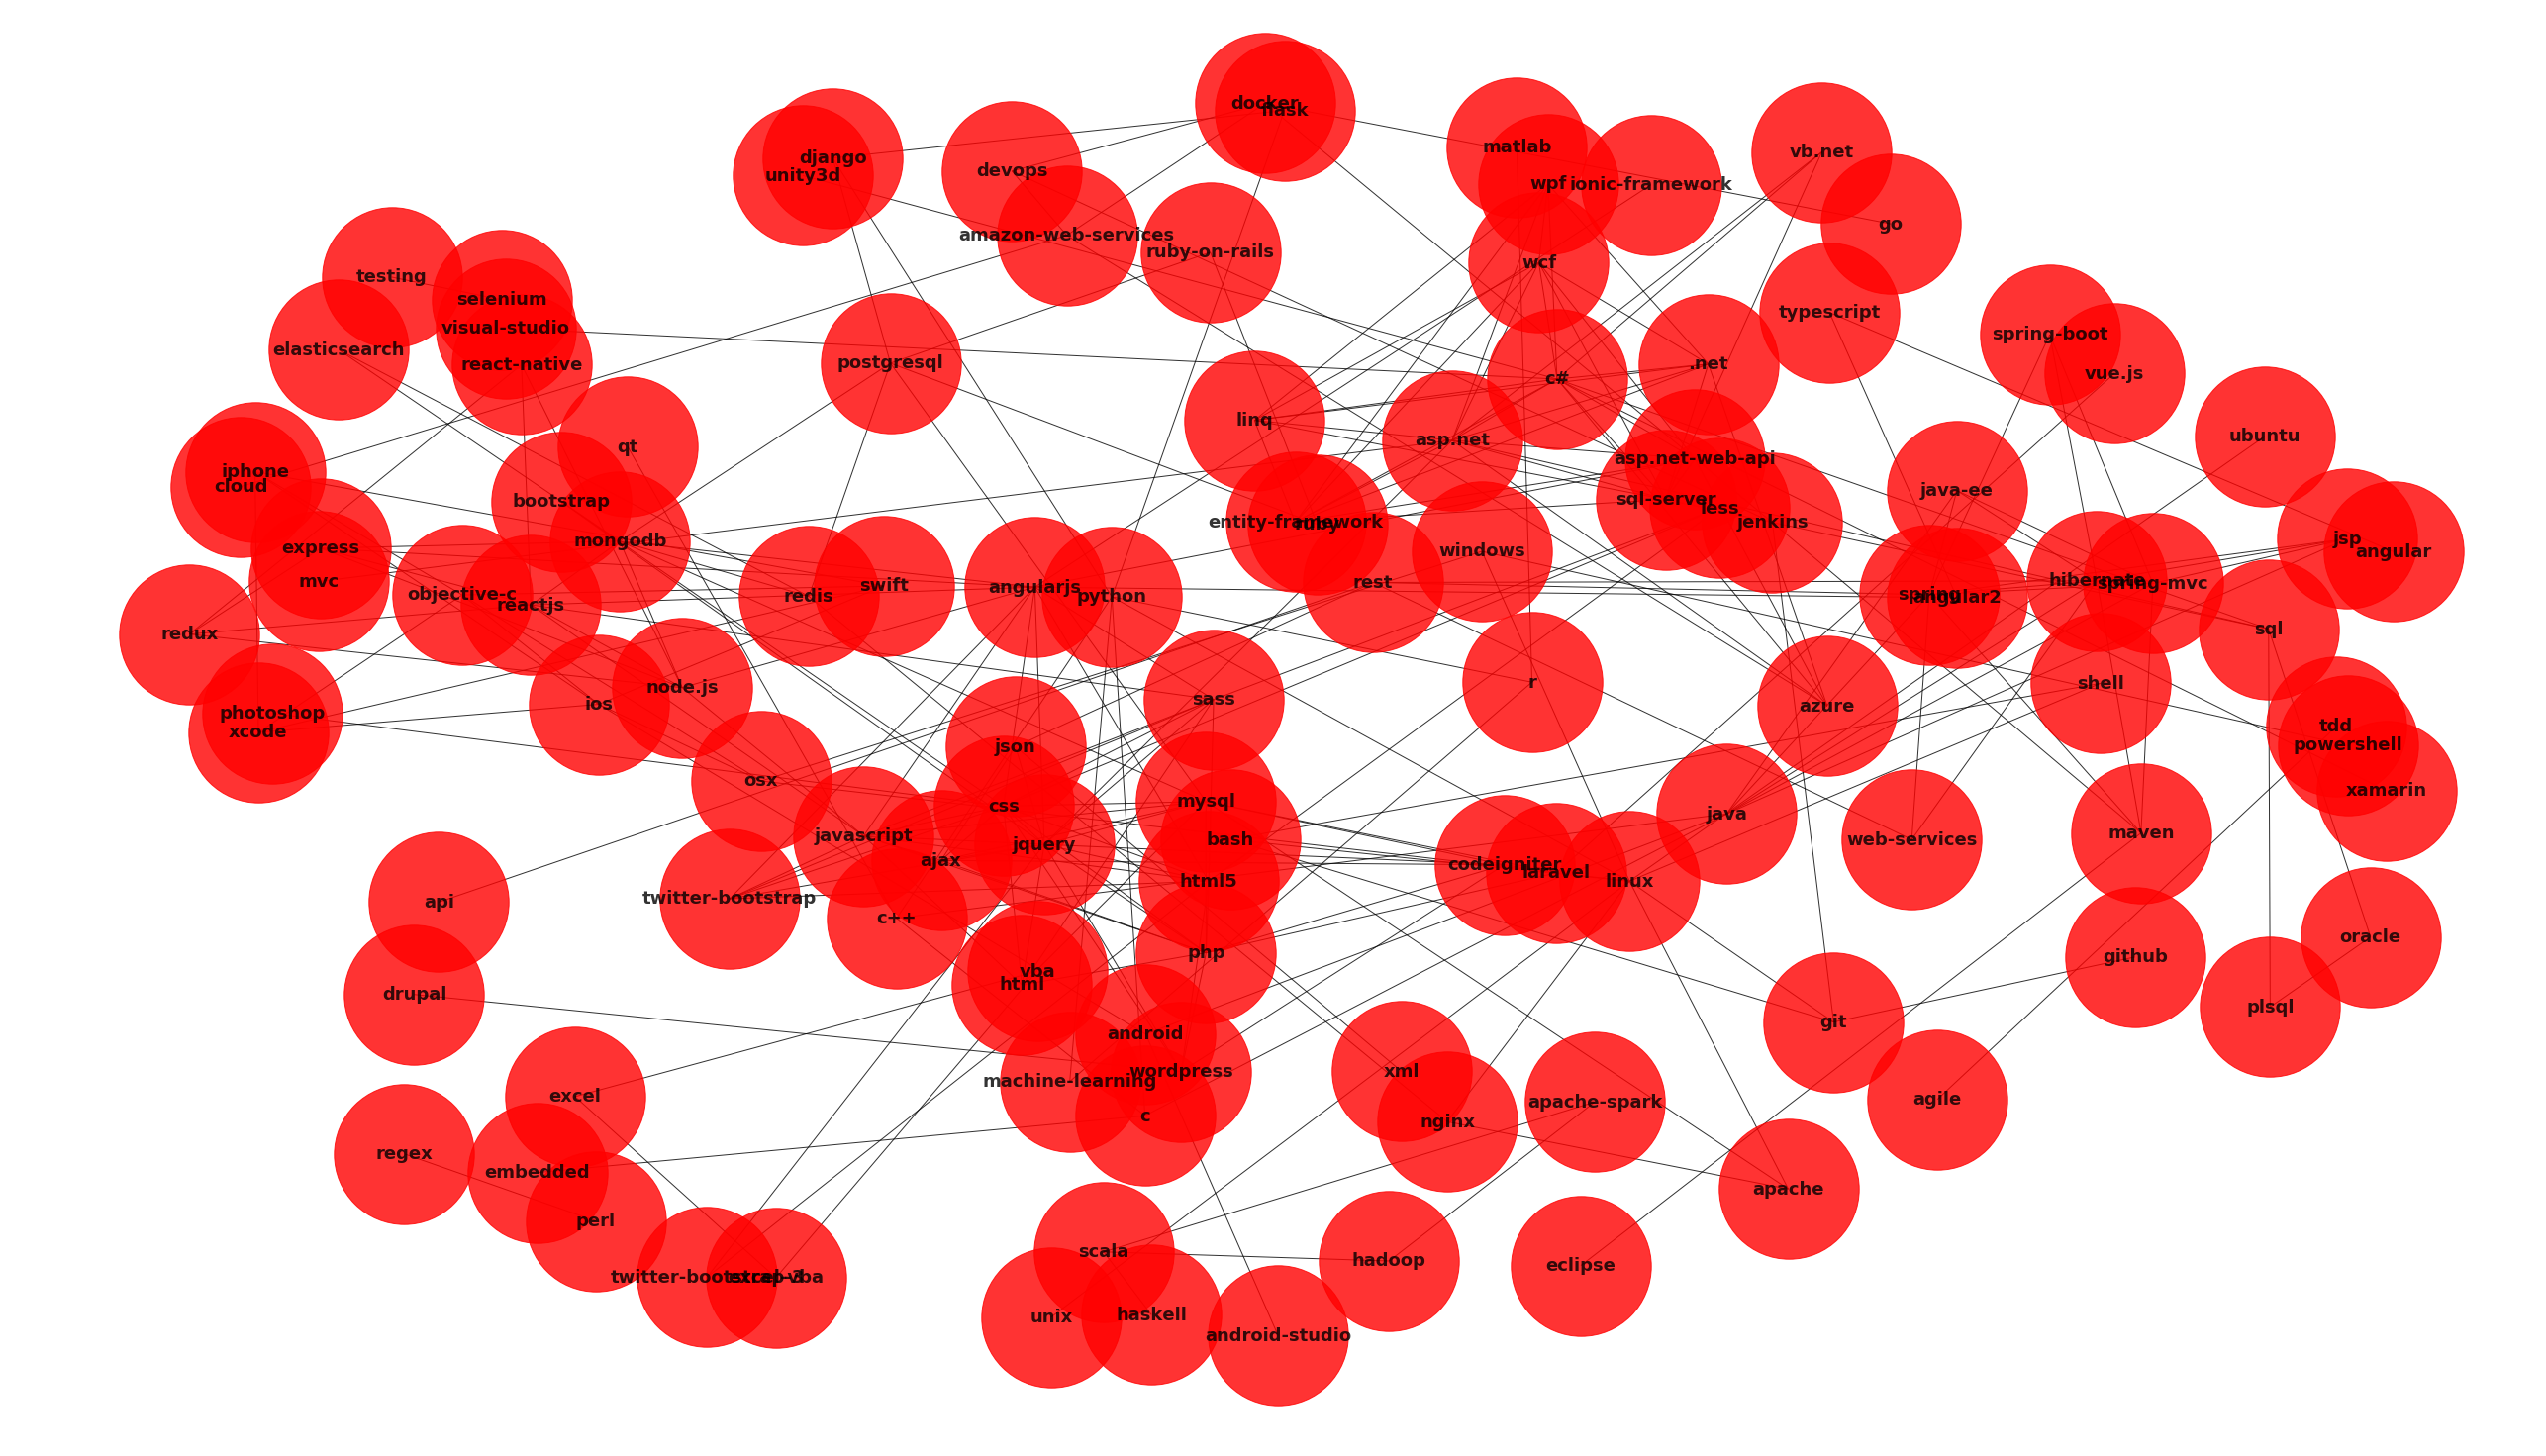

In [9]:
#this cell was copied from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
plt.figure(figsize=(35,20))
nx.draw(G, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, alpha=0.8, node_size=20000, font_weight='bold',
       font_size=18)

## Perform an Initial Clustering using k-clique Clustering

Begin to explore the impact of using different values of k.

In [10]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
for i in range(2,6):
    kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=i))
    print("with k={}, {} clusters form".format(i, len(kc_clusters)))

with k=2, 6 clusters form
with k=3, 16 clusters form
with k=4, 5 clusters form
with k=5, 5 clusters form


## Visualize The Clusters Produced from the K-Clique Algorithm

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

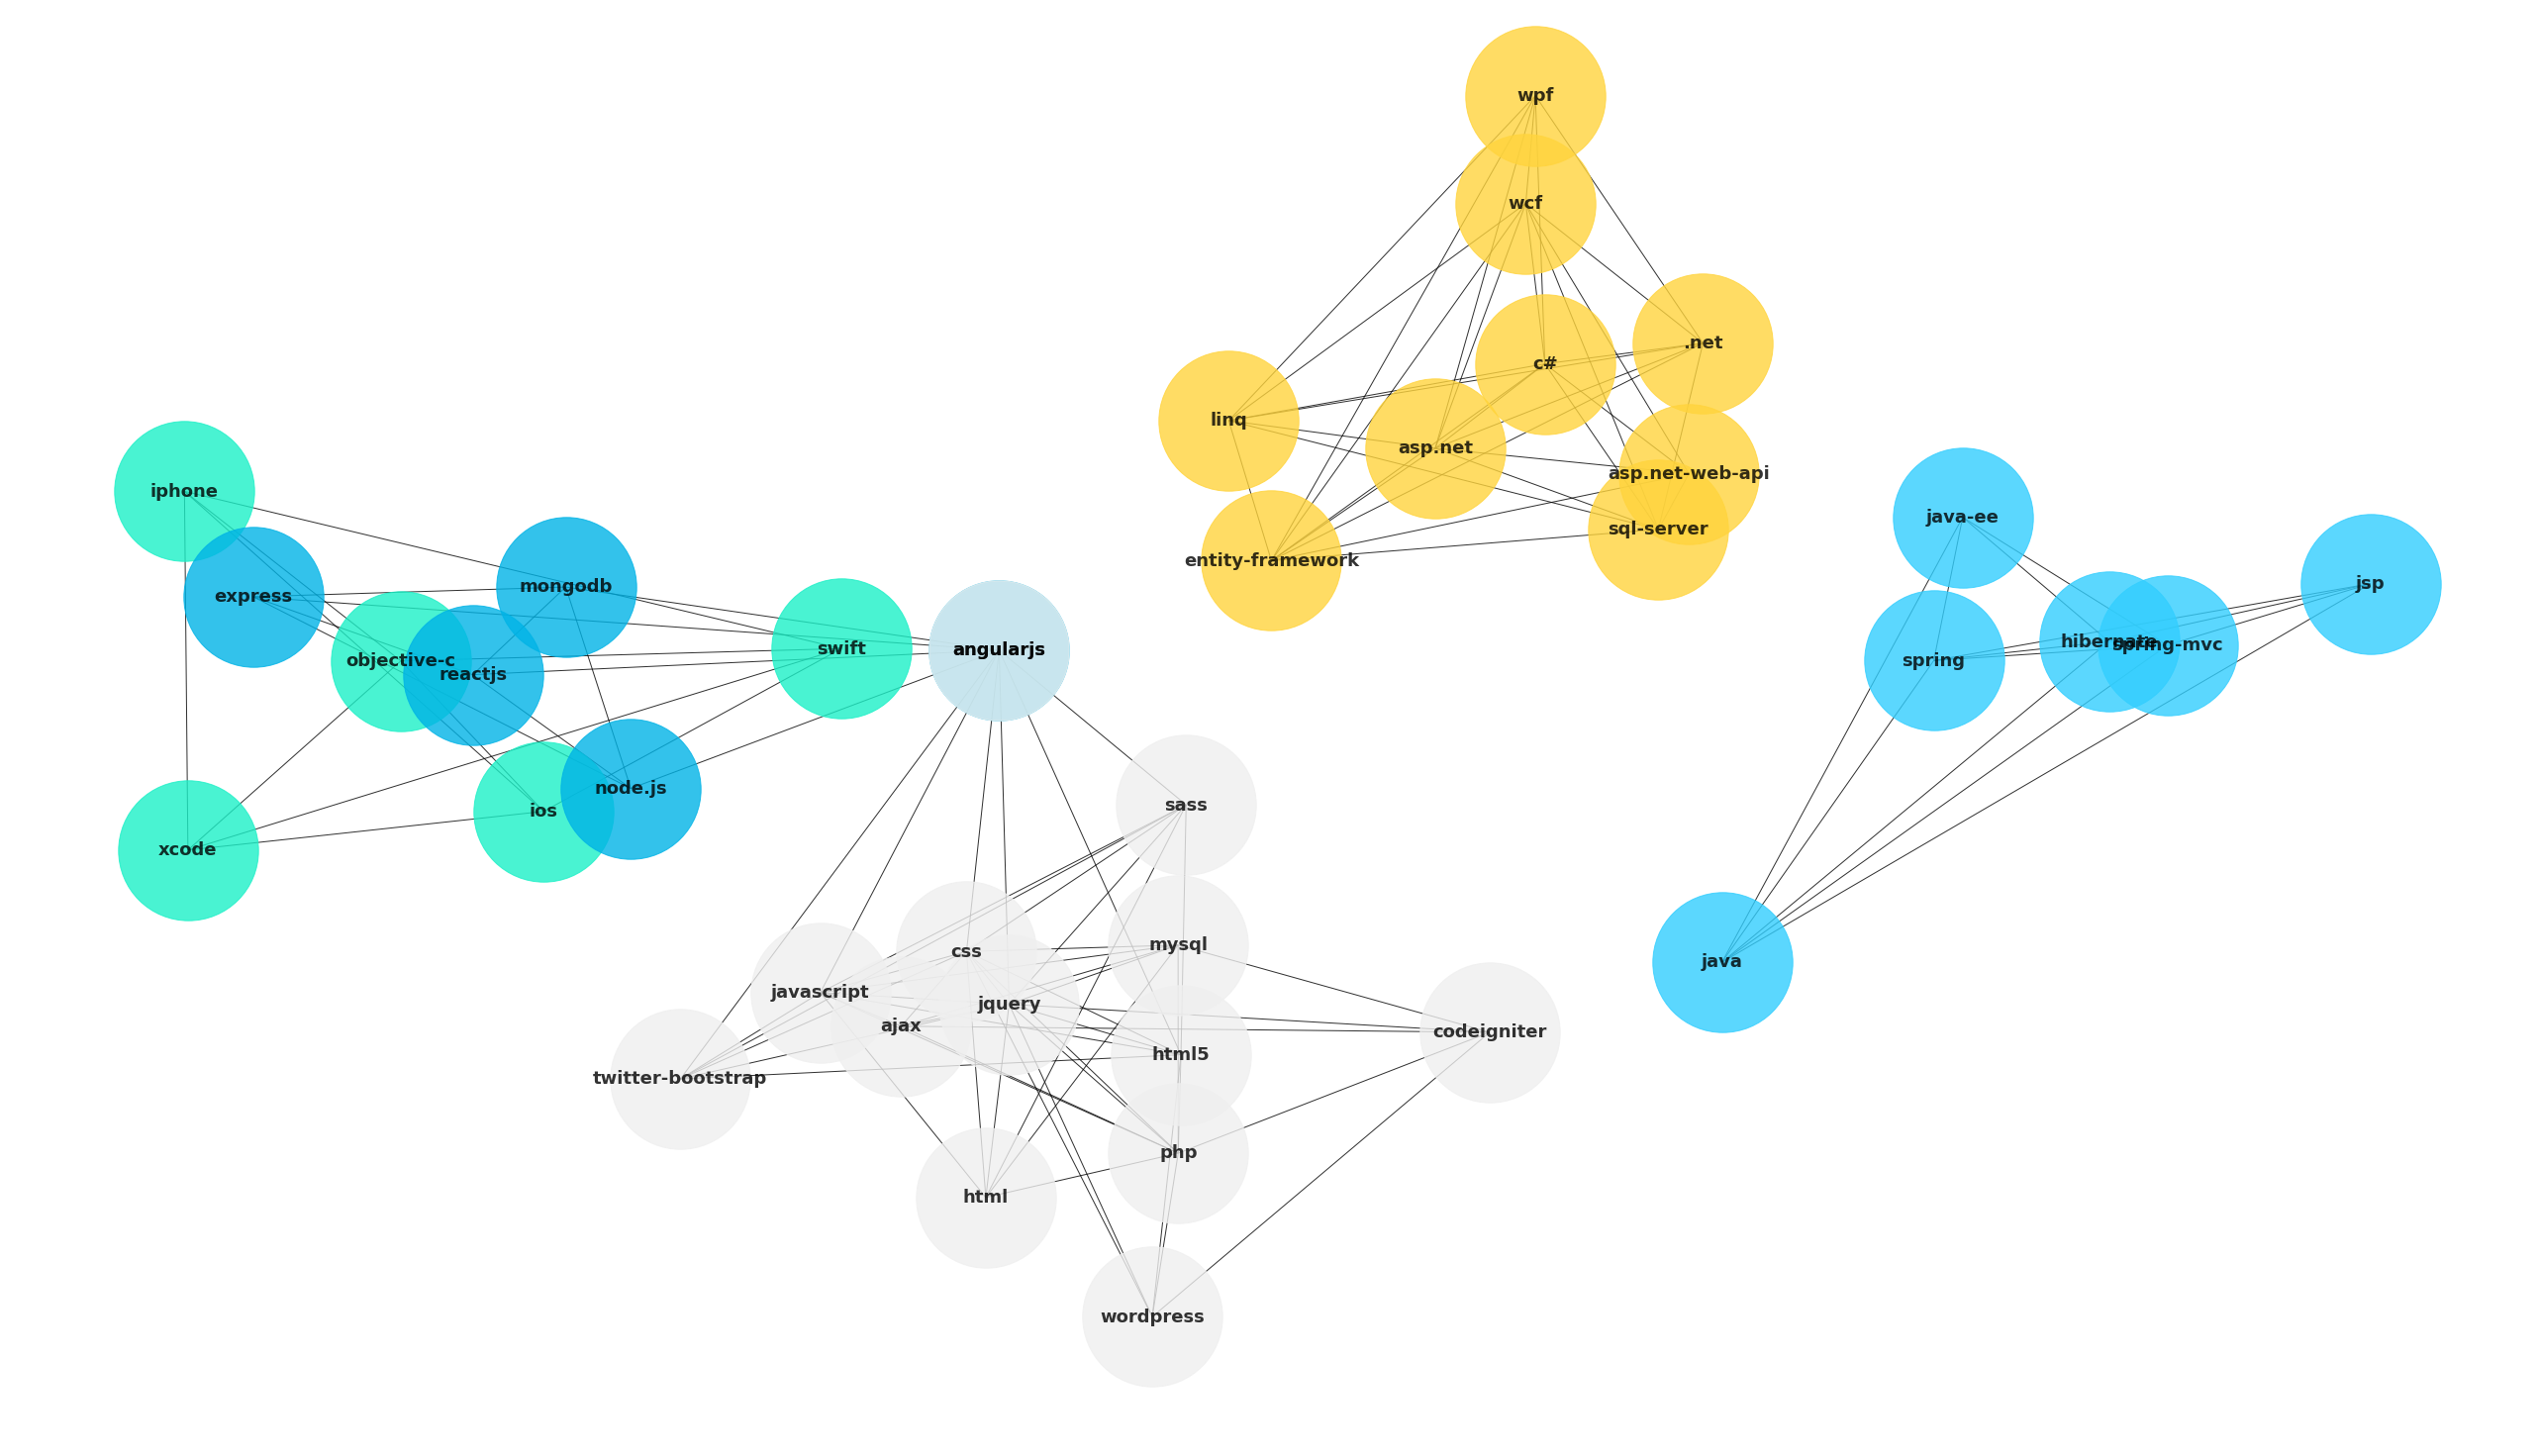

In [11]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
 
colors = [('teal', '#1cf0c7'),
         ('workzone_yellow', '#ffd43d'),
         ('light-blue', '#00b3e6'),
         ('medium-blue', '#32cefe'),
         ('gray', '#efefef'),
         ('dark-blue', '#1443ff')]

color_dict = dict(colors)

fig = plt.figure(figsize=(35,20))

for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, node_color=colors[n%len(colors)][1],
           alpha=0.8, node_size=20000, font_weight='bold', font_size=18)

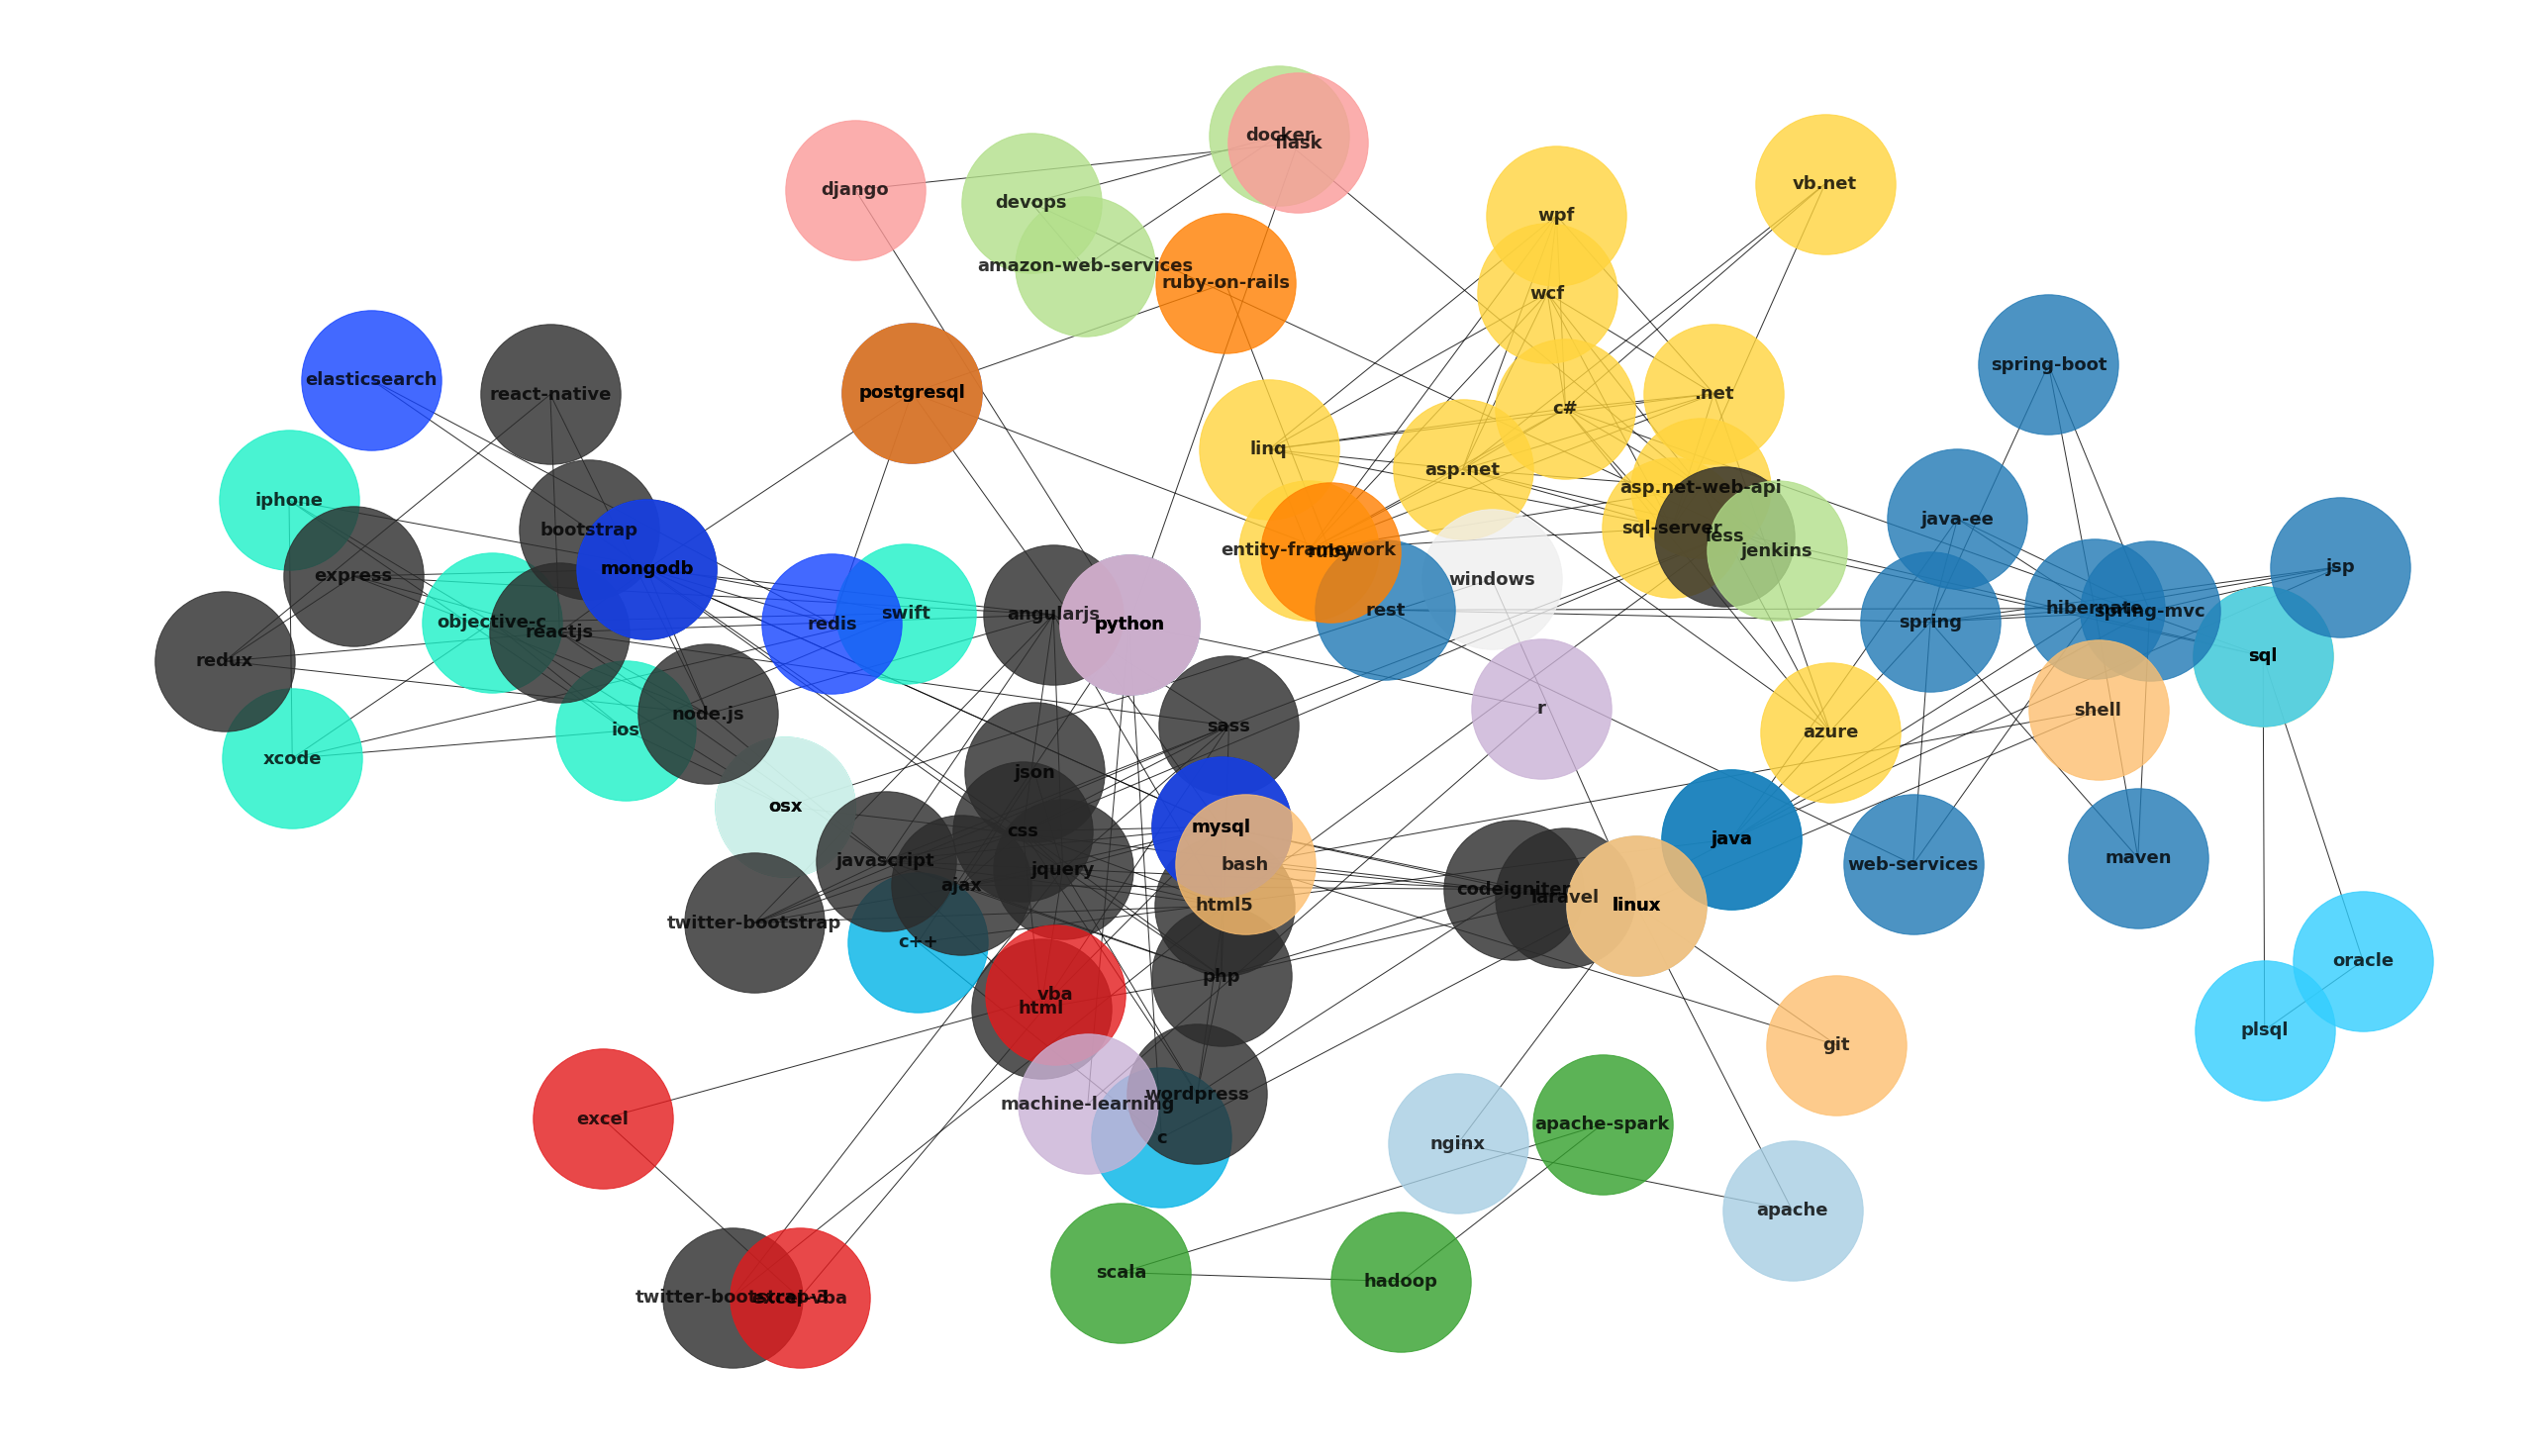

In [13]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

kc_clusters = list(nx.algorithms.community.k_clique_communities(G, k=3))

colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef','#2b2b2b', '#1443ff',
          '#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c',
          '#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99','#b15928']

fig = plt.figure(figsize=(35,20))

for n, ci in enumerate(kc_clusters):
    ci = G.subgraph(ci)
    nx.draw(ci, pos=nx.spring_layout(G, k=2, seed=10), with_labels=True, node_color=colors[n],
           alpha=0.8, node_size=20000, font_weight='bold', font_size=18)

## Perform an Alternative Clustering Using the Girvan-Newman Algorithm

Recluster the network using the Girvan-Newman algorithm. Remember that this will give you a list of cluster lists corresponding to the clusters that from removing the top $n$ edges according to some metric, typically edge betweenness.

In [14]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

gn_clusters = list(nx.algorithms.community.centrality.girvan_newman(G))
for n, clusters in enumerate(gn_clusters):
    print("after removing {} edges, there are {} clusters".format(n, len(clusters)))

after removing 0 edges, there are 7 clusters
after removing 1 edges, there are 8 clusters
after removing 2 edges, there are 9 clusters
after removing 3 edges, there are 10 clusters
after removing 4 edges, there are 11 clusters
after removing 5 edges, there are 12 clusters
after removing 6 edges, there are 13 clusters
after removing 7 edges, there are 14 clusters
after removing 8 edges, there are 15 clusters
after removing 9 edges, there are 16 clusters
after removing 10 edges, there are 17 clusters
after removing 11 edges, there are 18 clusters
after removing 12 edges, there are 19 clusters
after removing 13 edges, there are 20 clusters
after removing 14 edges, there are 21 clusters
after removing 15 edges, there are 22 clusters
after removing 16 edges, there are 23 clusters
after removing 17 edges, there are 24 clusters
after removing 18 edges, there are 25 clusters
after removing 19 edges, there are 26 clusters
after removing 20 edges, there are 27 clusters
after removing 21 edges, t

## Create a Visualization Wrapper

Now that you have an idea of how splintered the network becomes based on the number of edges removed, you'll want to examine some of the subsequent groups that gradually break apart. Since the network is quiet complex to start with, using subplots is not a great option; each subplot would be too small to accurately read. Create a visualization function `plot_girvan_newman(G, clusters)` which takes a NetworkX graph object as well as one of the clusters from the output of the Girvan-Newman algorithm above and plots the network with a unique color for each cluster.

> **Level-Up:** Experiment with different `nx.draw()` settings. See the [draw documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html) for a full list. Some recommended settings that you've previewed include the position parameter `pos`, `with_labels=True`, `node_color`, `alpha`, `node_size`, `font_weight` and `font_size`. Note that `nx.spring_layout(G)` is particularly useful for laying out a well formed network. With this, you can pass in parameters for the relative edge distance via `k` and set a `random_seed` to have reproducible results as in `nx.spring_layout(G, k=2.66, seed=10)`. For more details, see the [spring_layout documentation here](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.layout.spring_layout.html?highlight=spring%20layout#networkx.drawing.layout.spring_layout).

In [15]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

def plot_girvan_newman(G, clusters):
    fig = plt.figure(figsize=(35,20))
    colors = ['#1cf0c7','#ffd43d','#00b3e6','#32cefe','#efefef',
          '#1443ff','#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
          '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a','#ffff99',
          '#b15928','#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3',
          '#fdb462','#b3de69','#fccde5','#d9d9d9','#bc80bd','#ccebc5',
          '#ffed6f','#bf812d','#dfc27d','#f6e8c3','#f5f5f5','#c7eae5',
          '#80cdc1', '#35978f', '#01665e', '#003c30']
    for n, c in enumerate(clusters):
        ci = G.subgraph(c)
        nx.draw(ci, pos=nx.spring_layout(G, k=2.5, seed=10), with_labels=True, node_color=colors[n],
               alpha=0.8, node_size=20000, font_weight='bold', font_size=20)
    plt.show()

## Visualize the Various Clusters that Form Throughout the Girvan-Newman Algorithm

Use your function to visualize the various clusters that form throughout the Girvan-Newman algorithm as you remove more and more edges from the network.

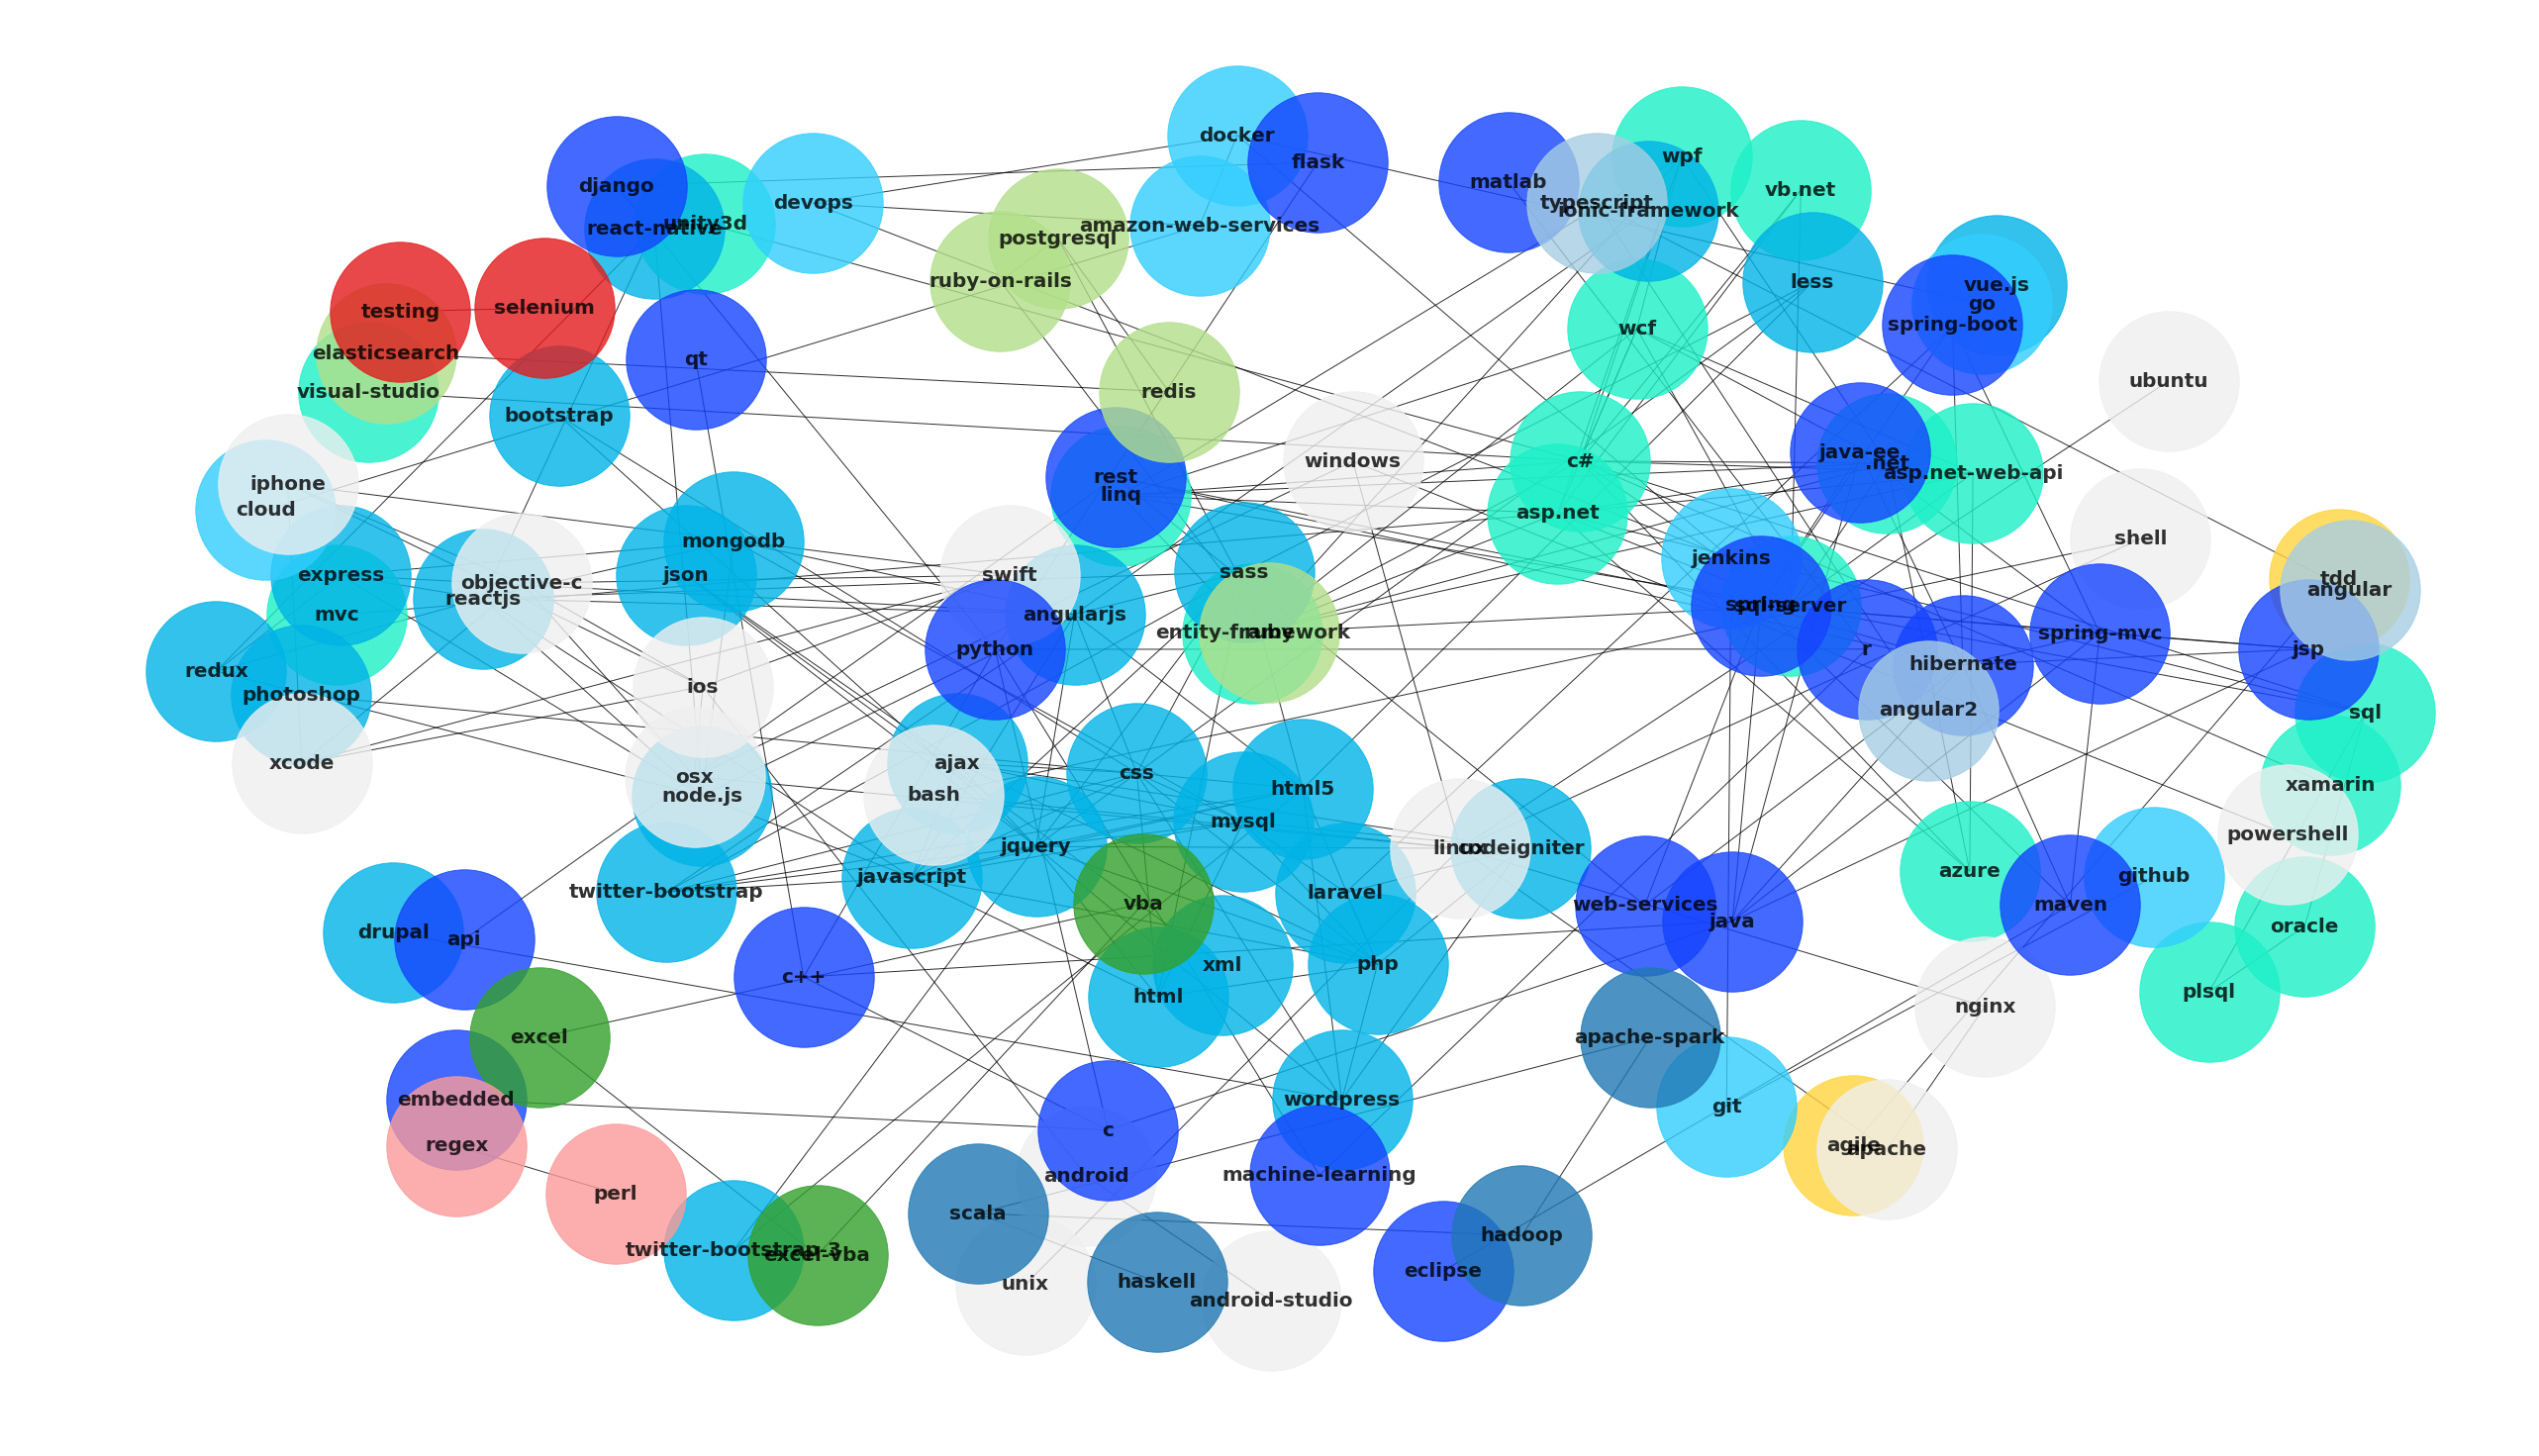

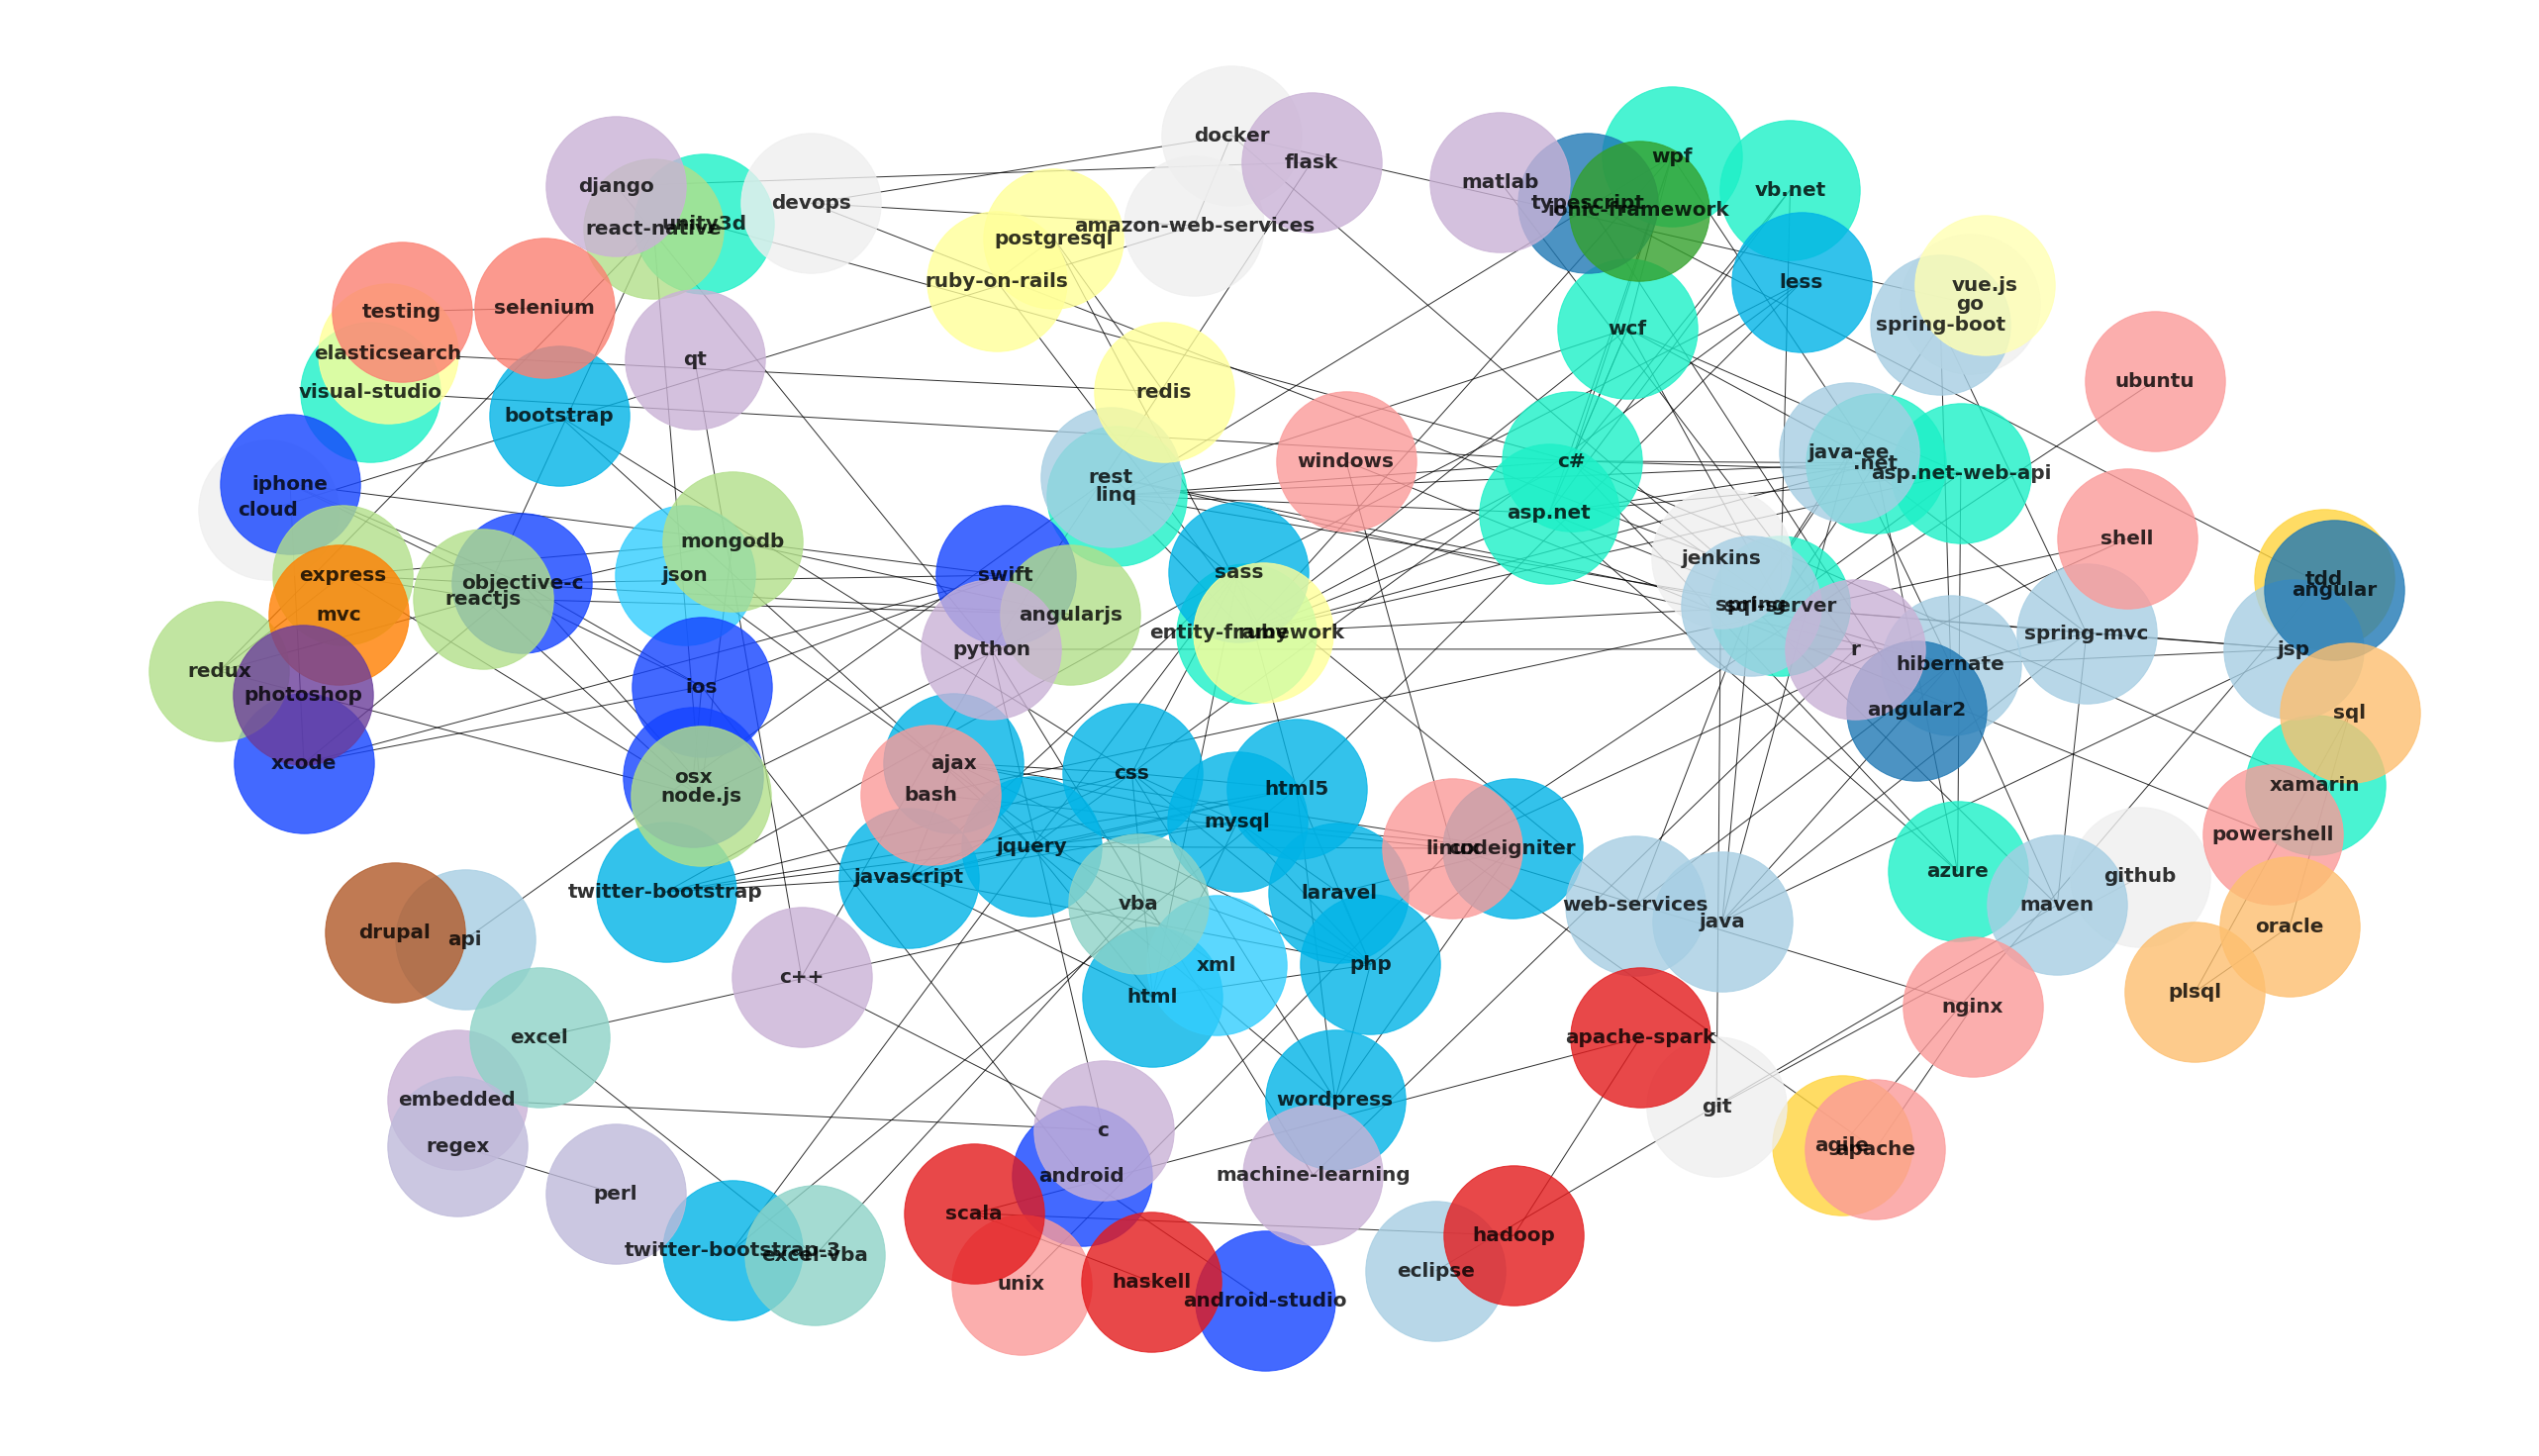

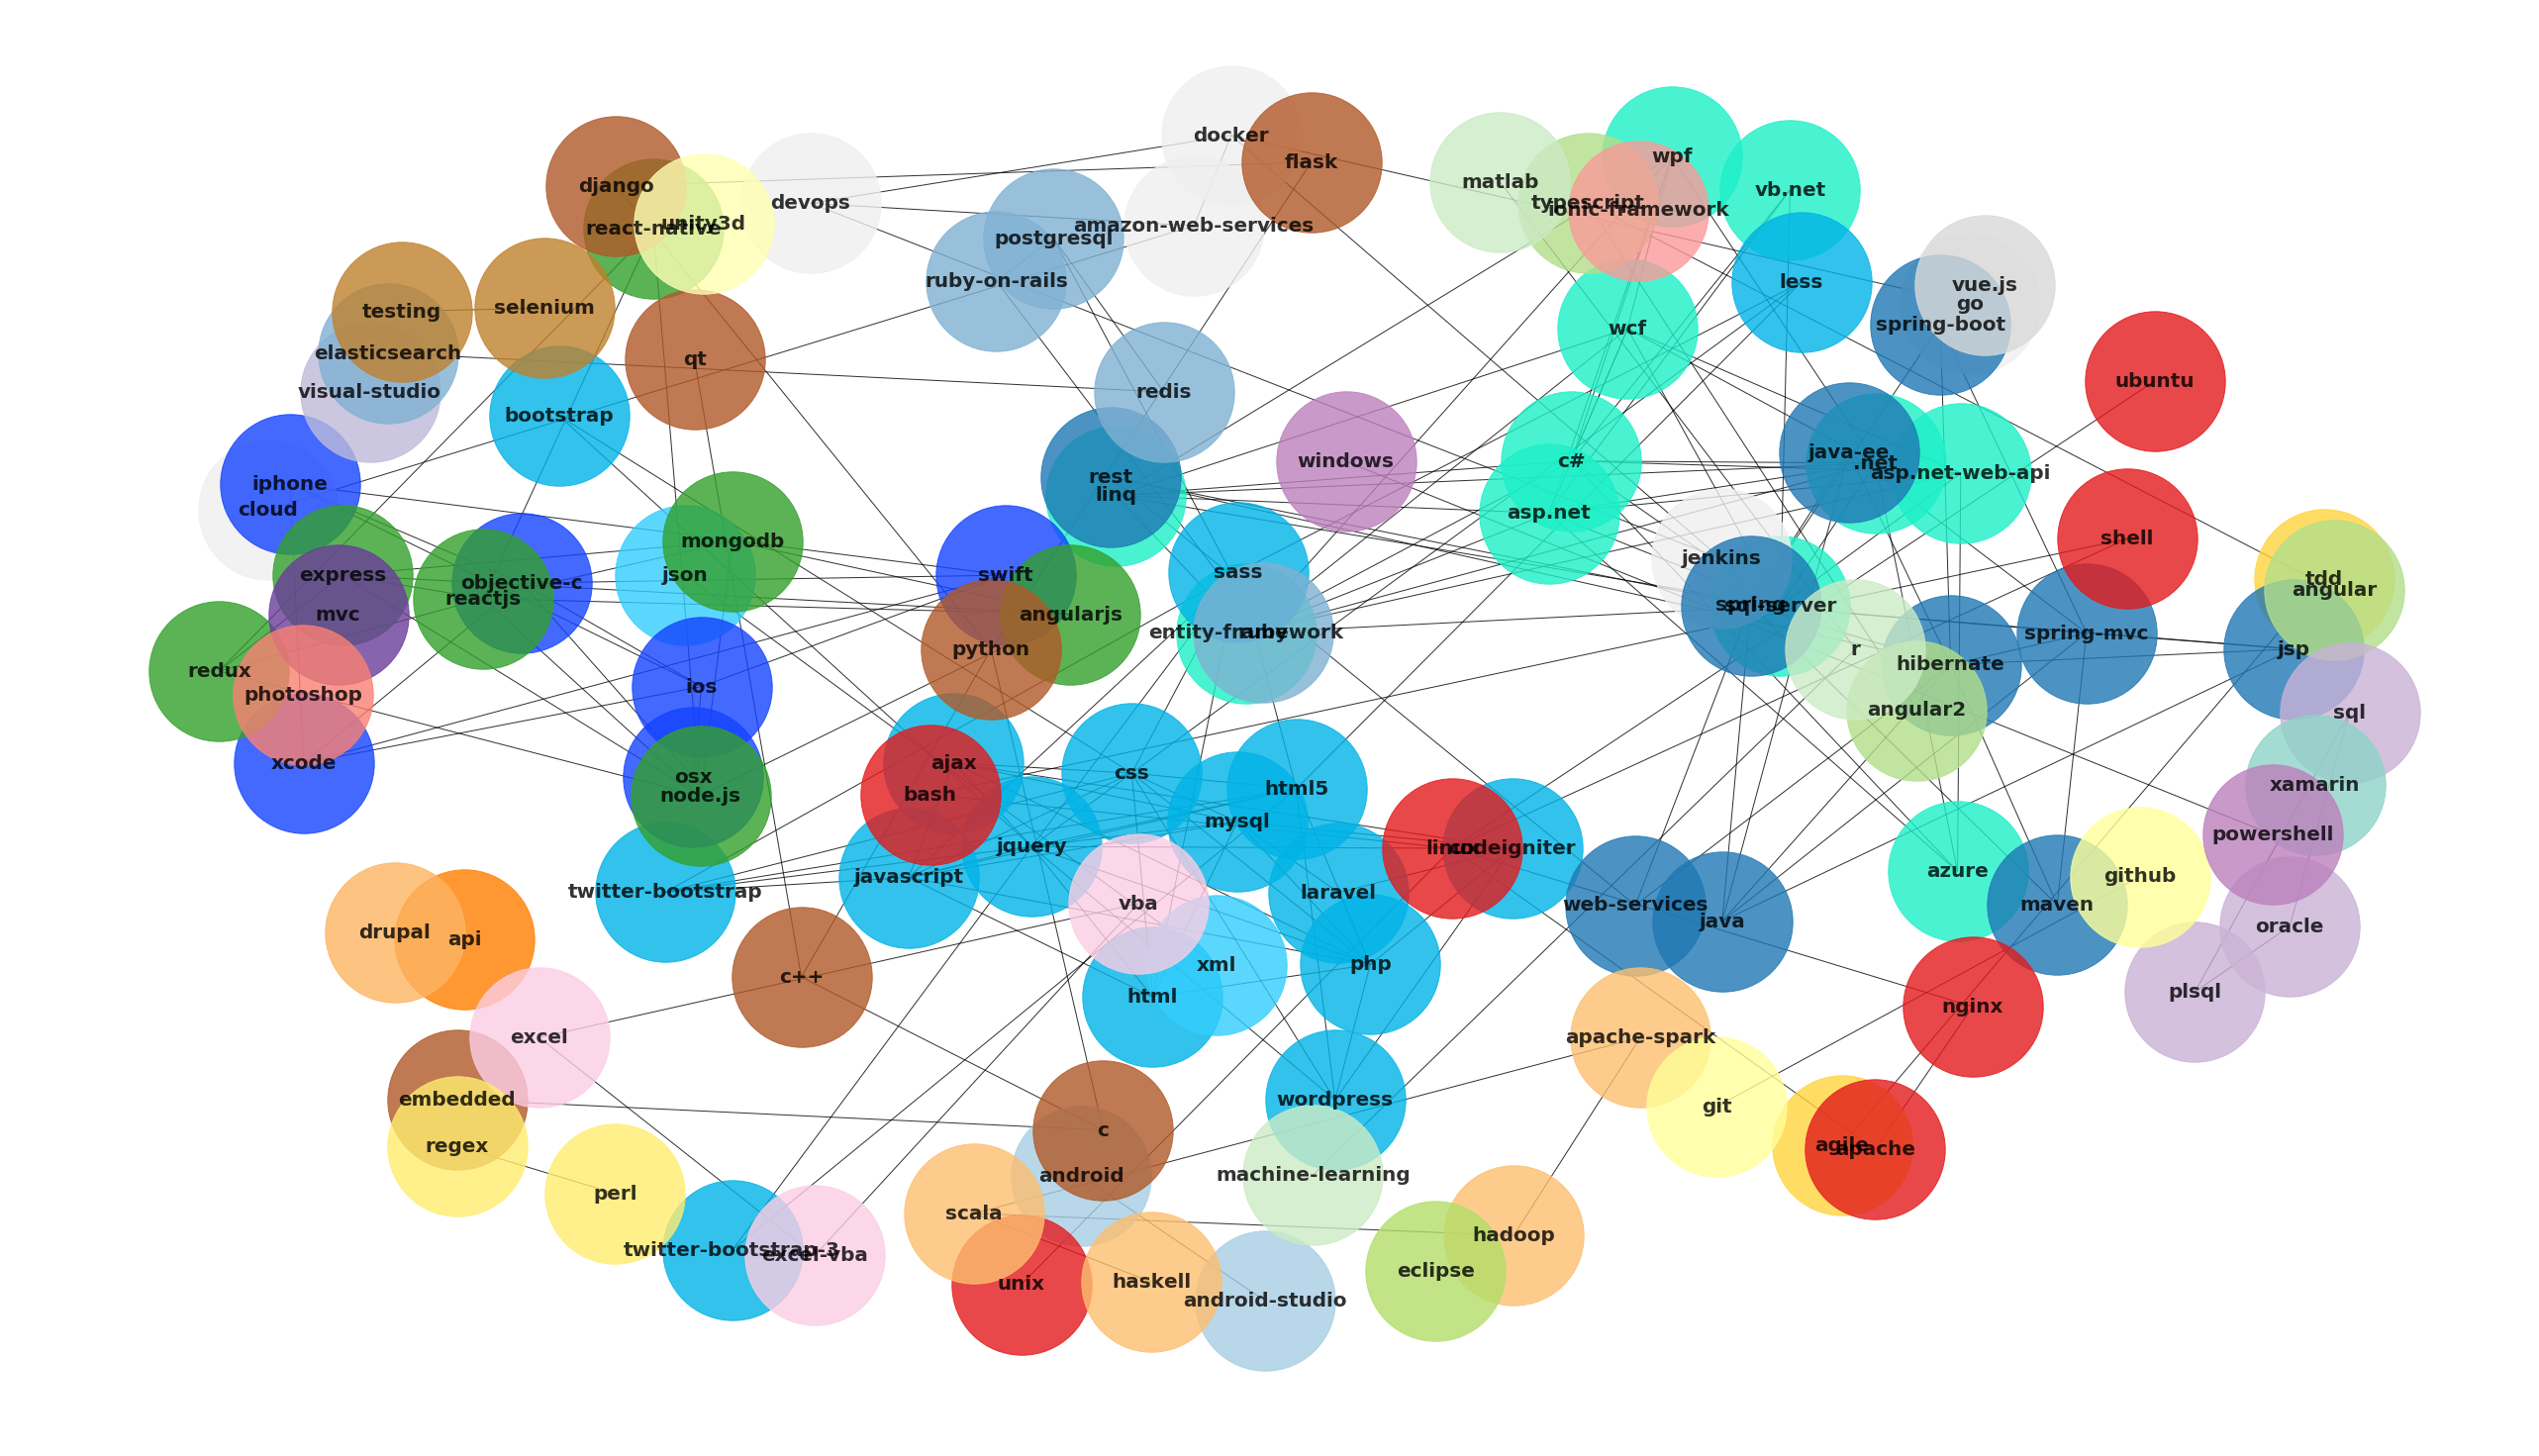

In [17]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
plot_girvan_newman(G, gn_clusters[5])
plot_girvan_newman(G, gn_clusters[15])
plot_girvan_newman(G, gn_clusters[24])

## Cluster Decay Rate

Create a visual to help yourself understand the rate at which clusters of this network formed versus the number of edges removed.

> **Level-Up**: Based on your graphic, what would you predict is an appropriate number of clusters? 

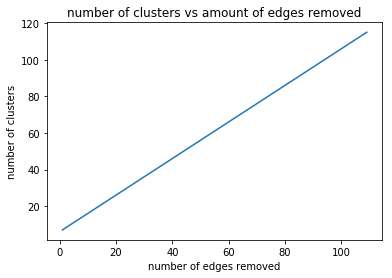

In [18]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution
y = [len(cluster) for cluster in gn_clusters]
x = [n+1 for n in range(len(gn_clusters))]
plt.plot(x, y)
plt.title("number of clusters vs amount of edges removed")
plt.ylabel('number of clusters')
plt.xlabel('number of edges removed')
plt.show()

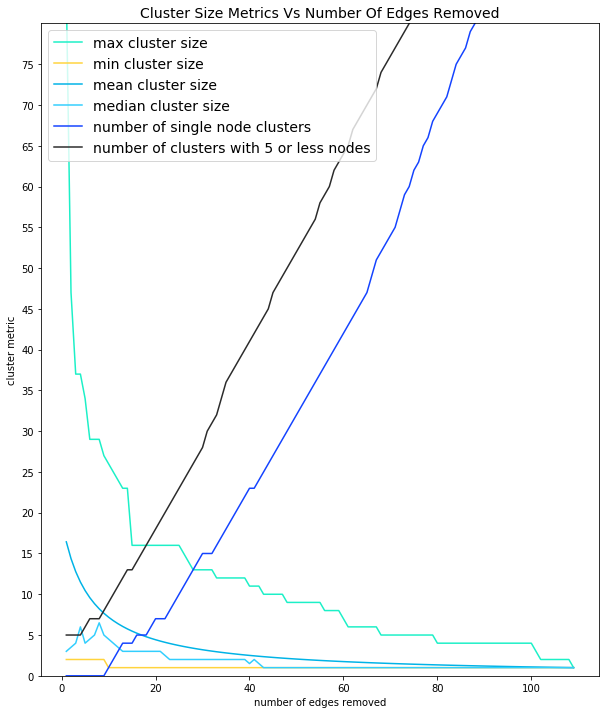

In [21]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

# While an initial investigation such as the one above does not appear to be particularly informative,
# exploring additional cluster metrics reveals more interesting patterns.
import numpy as np

fig=plt.figure(figsize=(10,12))

max_cluster_size = [max([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, max_cluster_size, color=colors[0], label="max cluster size")

min_cluster_size = [min([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, min_cluster_size, color=colors[1], label="min cluster size")

mean_cluster_size = [np.mean([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, mean_cluster_size, color=colors[2], label="mean cluster size")

median_cluster_size = [np.median([len(c) for c in cluster]) for cluster in gn_clusters]
plt.plot(x, median_cluster_size, color=colors[3], label="median cluster size")

single_node_clusters = [sum([1 if len(c)==1 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, single_node_clusters, color=colors[6], label="number of single node clusters")

small_clusters = [sum([1 if len(c)<=5 else 0 for c in cluster]) for cluster in gn_clusters]
plt.plot(x, small_clusters, color=colors[5], label="number of clusters with 5 or less nodes")

plt.legend(fontsize=14)
plt.title("cluster size metrics vs number of edges removed".title(), fontsize=14)
plt.xlabel("number of edges removed")
plt.ylabel("cluster metric")
plt.ylim(0,80)
plt.yticks(ticks=list(range(0,80,5)))
plt.show()

## Choose a Clustering 

Now that you have generated various clusters within the overall network, which do you think is the most appropriate or informative?

clusters: 22


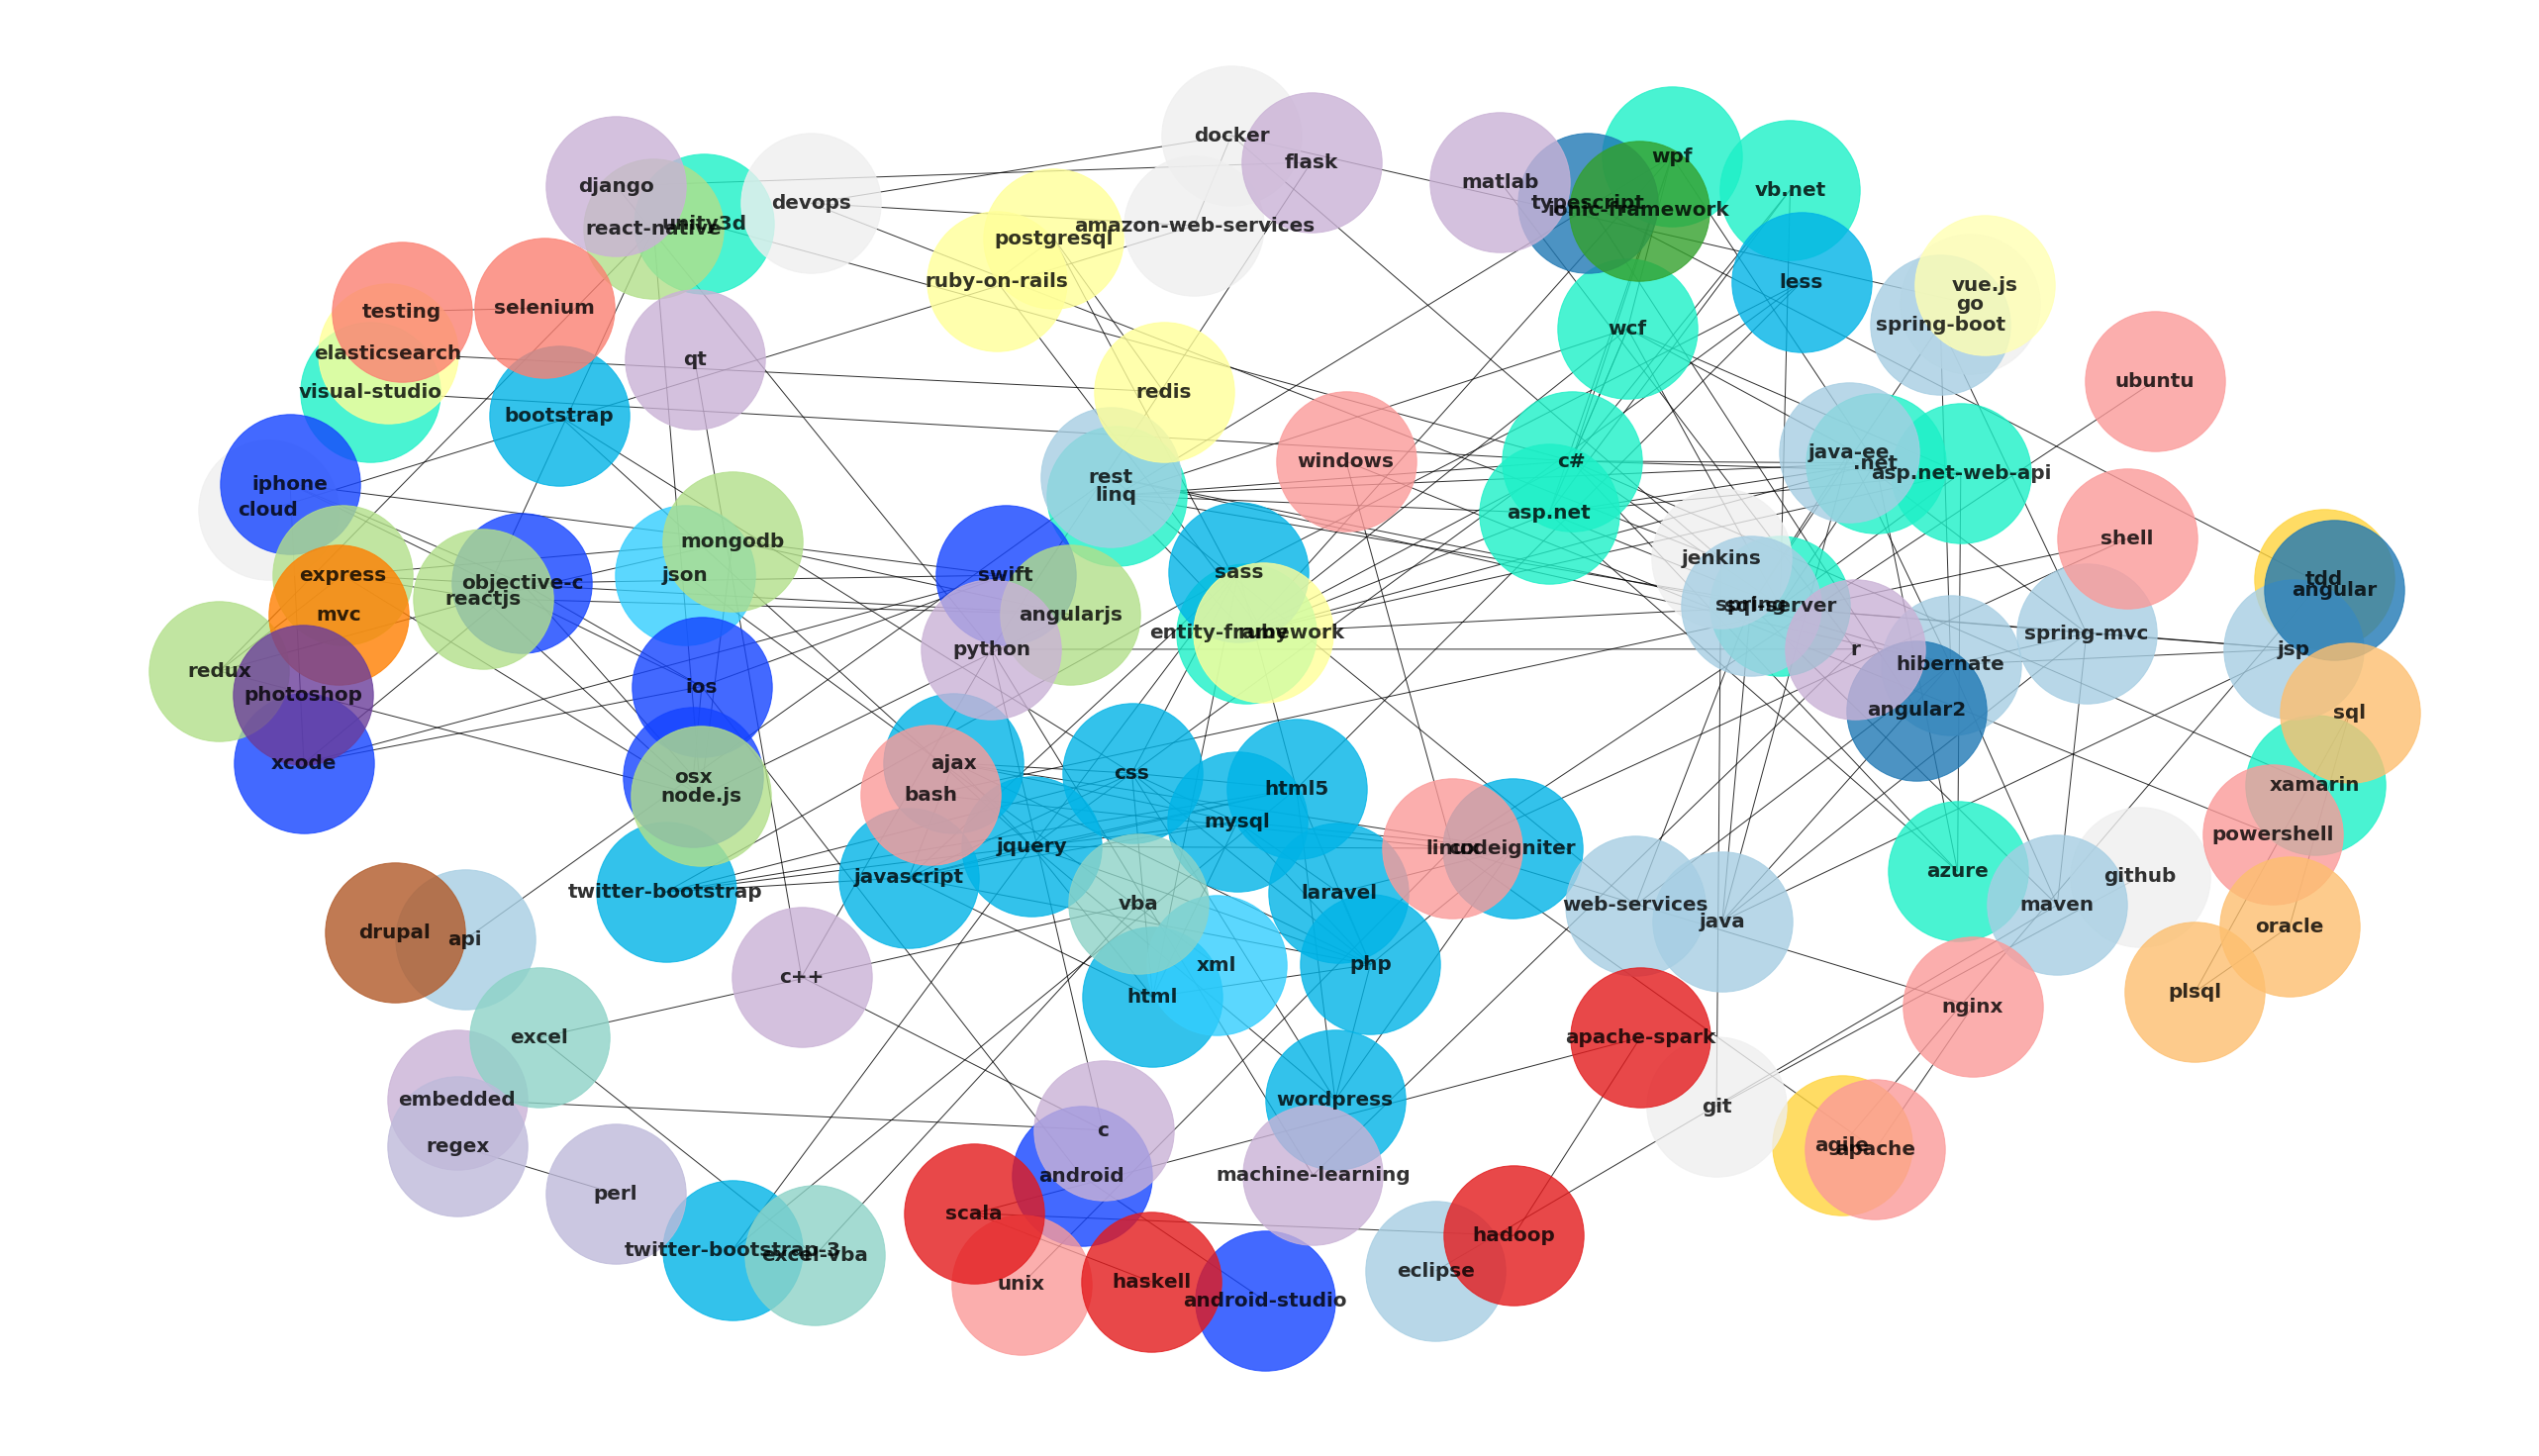

In [22]:
# This cell was taken from the solution at https://github.com/learn-co-curriculum/dsc-network-clustering-lab/tree/solution

# I think 15 edges removed will show the most informative clustering
print('clusters:',len(gn_clusters[15]))
plot_girvan_newman(G, gn_clusters[15])

## Summary

In this lab you practice using the k-clique and Girvan-Newman methods for clustering. Additionally, you may have also gotten a better sense of some of the current technological landscape. As you can start to see, network clustering provides you with powerful tools to further subset large networks into smaller constituencies allowing you to dig deeper into their particular characteristics.